# Analyzing Healthcare data (Exploratory Data Analysis 101)

Having been tired of Titanic Exploration and Iris Exploration, I thought it might be refreshing to use a new realworld dataset to explore! This kernel is primarily aimed at beginners to Exploratory Data Analysis although anybody can enjoy crunching the stats.

> "I'm tired of Titanic Exploration and Iris Exploration" - Abraham Lincoln (2005)

## Introduction 

NTR Vaidya Seva (or Arogya Seva) is the flagship healthcare scheme of the Goverment of Andhra Pradesh, India in which lower-middle class and low-income citizens of the state of Andhra Pradesh can obtain free healthcare for many major diseases and ailments. A similar program exists in the neighboring state of Telangana as well. 

## Let's Code!

We will start by importing the requisite libraries:
* *Pandas* for Data Loading and Exploration
* *Matplotlib, Seaborn* for Visualization.

In [22]:
# import requisite libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.Series.__unicode__ = pd.Series.to_string

let's read the dataset file into the kernel using Pandas *read_csv* function. read_csv can comfortably read Comma Separated Values (csv) files while *read_table* is used for other file types (like xlsx).

there are no restrictions in naming the data variable. *df*, *data* are the most common generic terms. We will go with *data*.

In [23]:
# read dataset into kernel
data = pd.read_csv("../input/ntrarogyaseva.csv")

Have a look at the data using the *head()* function that displays top 5 rows by default.

In [24]:
# display top rows using head 
data.head()
# data.head(10) for top 10 rows

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,03/08/2013 20:38:48,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,06/08/2013 07:26:15,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,09/08/2013 18:30:50,12500,22/03/2017 20:25:18,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,24/08/2013 19:37:41,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,28/08/2013 17:03:07,12500,22/03/2017 20:25:19,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D


let's print summary statistics (descriptive statistics) of the numeric columns in data. We will use the *describe* function of the data for this.

In [25]:
# print summary statistics
data.describe()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.0000,479688.000000,479688.000000,479688.000000
mean,239844.5000,44.912264,30428.941698,27652.205861
std,138474.1423,18.961084,27441.592281,25951.706037
min,1.0000,0.000000,5.000000,2.000000
25%,119922.7500,34.000000,12500.000000,12500.000000
50%,239844.5000,47.000000,25000.000000,23200.000000
75%,359766.2500,59.000000,35000.000000,30600.000000
max,479688.0000,107.000000,520000.000000,520000.000000


let's have a look at all the column names of the data. 

In [26]:
# display all the column names in the data
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

## Diving deeper into the data

### What is the age distribution of the data?

*value_counts()* is a Pandas function that can be used to print the distributions of data (in the specified column). Let's begin by checking the gender stats of the data.

In [27]:
# Display the counts of each value in the SEX column
data['SEX'].value_counts()

Male             260718
Female           178947
Male(Child)       25068
Female(Child)     14925
FEMALE               21
MALE                  9

Oops! It looks like there are duplicate values in this column. *Male* and *MALE* are not two different genders! 

We can *replace* the column names to fix this issue. I will also rename Male (Child) -> Boy and Female (Child) -> Girl for convinience purposes.

In [28]:
# mappings to standardize and clean the values
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}

In [29]:
# replace values using the defined mappings
data['SEX'] = data['SEX'].replace(mappings)
data['SEX'].value_counts()

Male      260727
Female    178968
Boy        25068
Girl       14925

Visualizing this distribution can be done easily using the in-built plot function of Pandas.

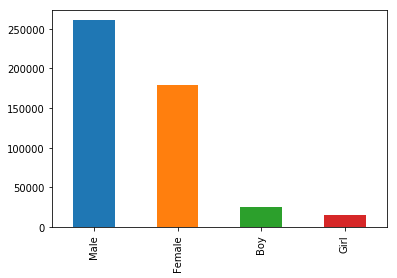

In [30]:
# plot the value counts of sex 
data['SEX'].value_counts().plot.bar()

### What is the age distribution of the data?

Mean, Median and Mode of the data.

In [31]:
# print the mean, median and mode of the age distribution
print("Mean: {}".format(data['AGE'].mean()))
print("Median: {}".format(data['AGE'].median()))
print("Mode: {}".format(data['AGE'].mode()))

Mean: 44.91226380480646
Median: 47.0
Mode: 0    0


Top 10 common ages of the data. Feel free to play around by replacing 10 with the number of your choice.

In [32]:
# print the top 10 ages
data['AGE'].value_counts().head(10)

0     17513
50    16191
55    15184
45    15052
60    13732
46    12858
56    12590
51    12470
40    11962
65    11878

Box plots are commonly used for visualizing a distribution when bar plots or scatter plots are too overwhelming to understand.

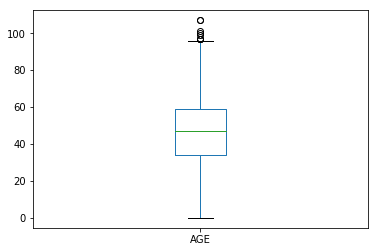

In [33]:
# boxplot for age variable
data['AGE'].plot.box()
# sns.boxplot(data['AGE'])

in the above diagram, the box represents the **[Interquartile Range (IQR)](http://https://en.wikipedia.org/wiki/Interquartile_range)** of the data. 

Interquartile range is the region where 50% of the data lies (i.e) 25% to 75% of the data.
Any data outside 1.5 times the IQR is generally considered an anomaly.  

The little circles in the above figure are considered outliters.

The seaborn library visualizes boxplot much better.

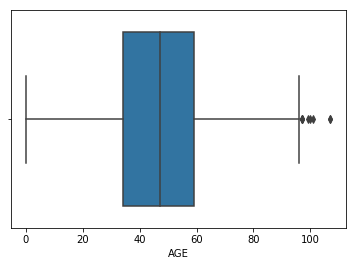

In [34]:
# better looking boxplot (using seaborn) for age variable
sns.boxplot(data['AGE'])

### Answering some questions

Now that we have a hold on the data being explored, let's jump into some questions to better understand the data!

**What if I wanted to analyze only the records pertaining to the district of Krishna?**

I would have to select a subset of the data to proceed. Thankfully, Pandas can help us do that too, in two steps:
    1. Condition to satisfy: data['DISTRICT_NAME']=='Krishna'
    2. Inserting the condition into the dataframe: data[data['DISTRICT_NAME']=='Krishna']
      

In [35]:
# subset involving only records of Krishna district
data[data['DISTRICT_NAME']=='Krishna'].head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
30,31,42,Female,OC,S12,MEDICAL ONCOLOGY,S12.26.1,Chemotherapy for Acute Myeloid Leukemia with I...,Ward-1,Vijayawada,Krishna,05/08/2014 18:19:41,60000,17/11/2017 20:08:45,60000,Nims Hospitals,G,HYDERABAD,Hyderabad,06/08/2014 00:00:00,01/09/2014 00:00:00,NO,NaN,D
56,57,52,Male,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ward-26,Vijayawada,Krishna,28/10/2014 20:12:49,30000,31/01/2017 19:49:15,25000,OZONE HOSPITALS,C,HYDERABAD,Ranga Reddy,28/10/2014 00:00:00,06/11/2014 00:00:00,NO,NaN,D
58,59,17,Female,SC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.10.1,Mitral Valve Replacement (With Valve),Atapaka,Kaikalur,Krishna,01/11/2014 19:24:52,145000,17/02/2017 19:22:00,135000,Karumuri Hospital,C,GUNTUR,Guntur,04/11/2014 00:00:00,12/11/2014 00:00:00,NO,NaN,D
97,98,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,Krishna,10/04/2015 01:25:46,12500,03/10/2017 20:37:11,10000,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,08/04/2015 00:00:00,NaN,YES,03/05/2015 00:00:00,P
111,112,65,Male,OC,M7,NEUROLOGY,M7.4,Medical Management of Ischemic Strokes,Chilakalapudi (R),Machilipatnam,Krishna,01/06/2015 17:27:57,20000,06/01/2017 23:39:39,10000,Rims General Hospital,G,KADAPA,YSR Kadapa,28/05/2015 00:00:00,01/06/2015 00:00:00,NO,NaN,D


**Most prevalent surgery, district wise**

Can be done by iterating through all the district names and selecting the subset of data for that district

In [36]:
# Most common surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("District: {}\nDisease and Count: {}".format(i,data[data['DISTRICT_NAME']==i]['SURGERY'].value_counts().head(1)))

District: Srikakulam
Disease and Count: Maintenance Hemodialysis For Crf    3970
District: Kurnool
Disease and Count: Surgical Correction Of Longbone Fracture    2943
District: Vizianagaram
Disease and Count: Surgical Correction Of Longbone Fracture    2754
District: Guntur
Disease and Count: Surgical Correction Of Longbone Fracture    5259
District: Vishakhapatnam
Disease and Count: Maintenance Hemodialysis For Crf    5270
District: West Godavari
Disease and Count: Maintenance Hemodialysis For Crf    5478
District: Krishna
Disease and Count: Maintenance Hemodialysis For Crf    6026
District: East Godavari
Disease and Count: Surgical Correction Of Longbone Fracture    6998
District: Prakasam
Disease and Count: Maintenance Hemodialysis For Crf    6215
District: Nellore
Disease and Count: Maintenance Hemodialysis For Crf    10824
District: YSR Kadapa
Disease and Count: Surgical Correction Of Longbone Fracture    4532
District: Chittoor
Disease and Count: Maintenance Hemodialysis For Crf 

We can observe that only two surgeries top all the districts: 
    * Dialysis (7 districts)
    * Longbone Fracture (6 districts)

**Average claim amount, district wise**

In [37]:
# Average claim amount for surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("District: {}\nAverage Claim Amount: ₹{}".format(i,data[data['DISTRICT_NAME']==i]['CLAIM_AMOUNT'].mean()))

District: Srikakulam
Average Claim Amount: ₹25593.712618634367
District: Kurnool
Average Claim Amount: ₹28598.91853309593
District: Vizianagaram
Average Claim Amount: ₹25097.78006899492
District: Guntur
Average Claim Amount: ₹31048.73950729927
District: Vishakhapatnam
Average Claim Amount: ₹25977.94638304871
District: West Godavari
Average Claim Amount: ₹27936.70608610806
District: Krishna
Average Claim Amount: ₹31015.383233247547
District: East Godavari
Average Claim Amount: ₹26166.136719737173
District: Prakasam
Average Claim Amount: ₹28655.81036215859
District: Nellore
Average Claim Amount: ₹26105.122376744654
District: YSR Kadapa
Average Claim Amount: ₹27945.216899192998
District: Chittoor
Average Claim Amount: ₹25708.102690948628
District: Anantapur
Average Claim Amount: ₹27664.166978581827


The standard deviation doesn't seem to be quite high in this case. Guntur district leads the pack with ₹31048 while Vizianagaram comes last with ₹25097

**Statistics by surgery category**

We will be using the Pandas GroupBy construct to gather statistics by grouping data by the surgery category.  The groupby of Pandas works similar to the SQL command of the same name

In [38]:
# group by surgery category to get mean statistics
data.groupby('CATEGORY_NAME').mean()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
CATEGORY_NAME,,,,
CARDIAC AND CARDIOTHORACIC SURGERY,220433.263365,51.764553,87052.165471,82487.123074
CARDIOLOGY,222494.427828,54.652048,33215.140211,26731.893660
COCHLEAR IMPLANT SURGERY,64429.337838,1.581081,520000.000000,516486.486486
CRITICAL CARE,225189.278328,51.014649,69927.226196,50185.150797
DERMATOLOGY,145752.231707,46.573171,28003.012195,21728.353659
ENDOCRINOLOGY,173188.782353,45.066667,18981.376471,14875.437255
ENT SURGERY,248911.441121,32.521940,15691.907198,14938.095612
GASTROENTEROLOGY,169310.423028,41.662383,37085.464601,23798.118922
GENERAL MEDICINE,116546.798682,35.330161,30347.573939,21840.991215


Cochlear Implant Surgery seems to be the costliest surgery, costing ₹520000 on average. Prostheses costs ₹1200, the cheapest. The youngest age group also happens to be for Cochlear Implant Surgery: 1.58 years, while Neurology has an average patient age of ~56.

**Most common surgery by age group**

To find the most common surgery by age group, let's round off the ages to the nearest ten's place. Make a copy of the dataframe for this operation as we would not want to tinker with the original dataframe.

In [39]:
# create a new memory copy of data to manipulate age 
dataround = data.copy()

We will use the Pandas round function to round off the Age. *-1* specifies that we round up one digit to the left of the decimal place

In [40]:
# round the age variable to 0 or 1 (nearest)
dataround['AGE'] = dataround['AGE'].round(-1)

visualizing the age groups using seaborn's countplot function

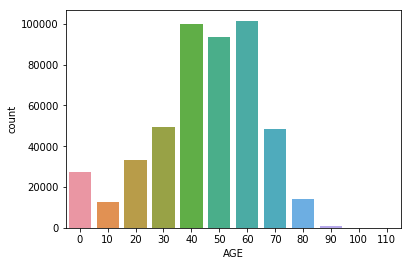

In [41]:
# a frequency plot for each age group
sns.countplot(dataround['AGE'])

**Most common surgery per age group**

In [42]:
# Most common surgery and count per age group
for i in sorted(dataround['AGE'].unique()):
    print("Age Group: {}\nMost Common Surgery and Count: {}".format(i,data[data['AGE']==i]['CATEGORY_NAME'].value_counts().head(1)))

Age Group: 0
Most Common Surgery and Count: PEDIATRICS    15096
Age Group: 10
Most Common Surgery and Count: POLY TRAUMA    390
Age Group: 20
Most Common Surgery and Count: POLY TRAUMA    729
Age Group: 30
Most Common Surgery and Count: POLY TRAUMA    1125
Age Group: 40
Most Common Surgery and Count: MEDICAL ONCOLOGY    2425
Age Group: 50
Most Common Surgery and Count: MEDICAL ONCOLOGY    3171
Age Group: 60
Most Common Surgery and Count: MEDICAL ONCOLOGY    2447
Age Group: 70
Most Common Surgery and Count: POLY TRAUMA    1845
Age Group: 80
Most Common Surgery and Count: POLY TRAUMA    584
Age Group: 90
Most Common Surgery and Count: POLY TRAUMA    67
Age Group: 100
Most Common Surgery and Count: POLY TRAUMA    1
Age Group: 110
Most Common Surgery and Count: Series([], )


## Practise Exercises

Feeling adventerous? Fork this notebook and solve the following challenges to get some practise!

**Value counts of districts**

**Average claim amount for male patients**

**Most common hospital names for treatment**

**Most common age groups  by district** (hint: use dataround)

**Add your own questions here!**

## The End

You're reached the end of the notebook. Congratulations!

I really hope you learnt something and enjoyed going through this notebook. If yes, please upvote and share the notebook!

Feedback? Corrections? Applause? Please comment below! 

This is my first public educative kernel. I hope my performance improves over epochs!
